In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [65]:
img_org = cv2.imread('./training_image/all_emoji.png',
#                      cv2.IMREAD_GRAYSCALE
                    )

In [66]:
img_org=cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

In [67]:
img_org.shape

(344, 1658, 3)

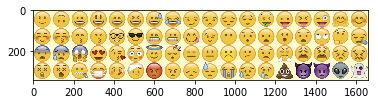

In [68]:
plt.imshow(img_org)

In [69]:
backgroud_threshold = 200

In [72]:
m, n, c = img_org.shape

In [73]:
# column_sep=[]
# for i in range(n):
#     if np.mean(img_org[:, i])>backgroud_threshold:
#         column_sep.append(i)

# single_col_sep_s=[]
# start=0
# end=0
# for i, sep in enumerate(column_sep):
#     if i>0:
#         if column_sep[i]-column_sep[i-1]>2:
#             end = column_sep[i-1]
#             single_col_sep_s.append(int(np.mean([start, end])))
#             start = column_sep[i]

# single_col_sep = single_col_sep_s+[-1]
# single_col_sep[0]=0

In [74]:
single_col_sep=[0, 91, 183, 280, 368, 463,
                551, 650, 739, 830, 919, 1014,
                1107, 1196, 1288, 1384, 1478, 1573, -1]

In [75]:
single_row_sep = [0, 86, 172, 258, -1]

In [76]:
images = []

In [77]:
for j,_ in enumerate(single_row_sep):
    for i,_ in enumerate(single_col_sep):
        if i>0 and j>0:
            images.append((img_org[single_row_sep[j-1]:single_row_sep[j],
                              single_col_sep[i-1]:single_col_sep[i]]))
    

In [78]:
len(images)

72

In [79]:
images_normal = images[:-5]

In [80]:
images_small = []

In [81]:
for image in images_normal:
    images_small.append(cv2.resize(image, (72, 72)) )

In [82]:
images_small = np.array(images_small)

In [83]:
images_small.shape

(67, 72, 72, 3)

In [86]:
images_small.dump('../data/seperated_image_emoji_rgb.pkl.z')